训练集的数量: m_train = 209
测试集的数量 : m_test = 50
每张图片的宽/高 : num_px = 64
每张图片的大小 : (64, 64, 3)
训练集_图片的维数 : (209, 64, 64, 3)
训练集_标签的维数 : (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)
训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)
----------------测试---------------------
迭代的次数: 0 ， 误差值： 0.693147
迭代的次数: 100 ， 误差值： 0.584508
迭代的次数: 200 ， 误差值： 0.466949
迭代的次数: 300 ， 误差值： 0.376007
迭代的次数: 400 ， 误差值： 0.331463
迭代的次数: 500 ， 误差值： 0.303273
迭代的次数: 600 ， 误差值： 0.279880
迭代的次数: 700 ， 误差值： 0.260042
迭代的次数: 800 ， 误差值： 0.242941
迭代的次数: 900 ， 误差值： 0.228004
迭代的次数: 1000 ， 误差值： 0.214820
迭代的次数: 1100 ， 误差值： 0.203078
迭代的次数: 1200 ， 误差值： 0.192544
迭代的次数: 1300 ， 误差值： 0.183033
迭代的次数: 1400 ， 误差值： 0.174399
迭代的次数: 1500 ， 误差值： 0.166521
迭代的次数: 1600 ， 误差值： 0.159305
迭代的次数: 1700 ， 误差值： 0.152667
迭代的次数: 1800 ， 误差值： 0.146542
迭代的次数: 1900 ， 误差值： 0.140872
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %


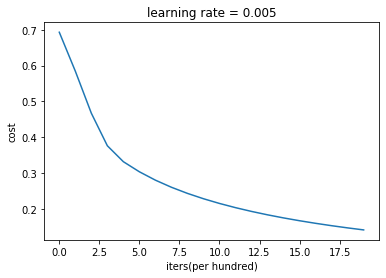

y=1.0, it is a cat" picture.


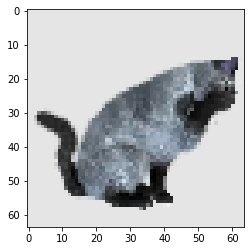

In [18]:
"""
  file_name : logistic regression
  author:     init_bin
  description:逻辑回归算法实现猫图片的二分类
  version:    1.0
  date:       2019.6.24
"""
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datasets.lr_utils import load_dataset

#获取数据
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
#train_set_x_orig ：保存的是训练集里面的图像数据（本训练集有209张64x64的图像）。
###train_set_x_orig 是一个维度为(m_train，num_px，num_px，3）的数组
#train_set_y ：保存的是训练集的图像对应的分类值（【0 | 1】，0表示不是猫，1表示是猫）。
#test_set_x_orig ：保存的是测试集里面的图像数据（本训练集有50张64x64的图像）。
#test_set_y ： 保存的是测试集的图像对应的分类值（【0 | 1】，0表示不是猫，1表示是猫）。
#classes ： 保存的是以bytes类型保存的两个字符串数据，数据为：[b’non-cat’ b’cat’]

#数据预处理
m_train = train_set_y.shape[1] #训练的图片数目
m_test = test_set_y.shape[1]   #测试的图片数目
num_px = train_set_x_orig.shape[1] #图片的高度和宽度
print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y.shape))
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

#构建sigmoid函数
def sigmoid(x):
    """
    参数： x —— 任何大小的标量或numpy数组

    返回： s - sigmoid(x)
    """
    s = 1/(1 + np.exp(-x))
    return s

#初始化参数w b
def initialize_zeros(dim):
    """
    此函数为w创建一个维度为（dim，1）的0向量，并将b初始化为0。

        参数：
            dim  - 我们想要的w矢量的大小（或者这种情况下的参数数量）

        返回：
            w  - 维度为（dim，1）的初始化向量。
            b  - 初始化的标量（对应于偏差）
    """
    w = np.zeros(shape = (dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b,float) or isinstance(b, int))
    return (w, b)

#计算成本函数及对参数的导数，执行向前、向后传播
def propagate(w,b,X,Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)
    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m = X.shape[1]
    #向前传播
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    #反向传播
    dw = (1.0 / m) * np.dot(X, (A - Y).T)
    db = (1.0 / m) * np.sum(A - Y)
    #使用断言确保数据格式正确
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost) #从数组的形状中删除单维度条目,返回数组
    #创建字典，保存dw db
    grads = {"dw": dw, "db": db}
    return (grads, cost)

#梯度下降法更新参数
def optimize(w, b, X, Y, num_iter, learning_rate, print_cost = False):
    """
 此函数通过运行梯度下降算法来优化w和b

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值

    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。

    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    costs = []
    for i in range(num_iter):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        #控制存储和打印cost
        if i % 100 == 0:
            costs.append(cost)
        if (i % 100 == 0) and (print_cost):
            print("迭代的次数: %i ， 误差值： %f" % (i,cost))
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return (params, grads, costs)
                  
#预测函数
def predict(w, b, X):
    """
    使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据

    返回：
        Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1,m)) #预留存1 ， 0
    A = sigmoid(np.dot(w.T, X) + b)    #预测有猫的概率
    for i in range(A.shape[1]):        #将预测概率转化为0，1
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    assert(Y_prediction.shape == (1, m))
    return Y_prediction
#整合到一个函数里
def model(X_train, Y_train, X_test, Y_test, num_iter = 2000, learning_rate = 0.005,print_cost = False ):
    """通过调用之前实现的函数来构建逻辑回归模型

        参数：
            X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
            Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
            X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
            Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
            num_iterations  - 表示用于优化参数的迭代次数的超参数
            learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
            print_cost  - 设置为true以每100次迭代打印成本

        返回：
            d  - 包含有关模型信息的字典。
    """
    w, b = initialize_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iter, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    #打印训练后的准确性
    print("训练集准确性："  , format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100) ,"%")
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iter": num_iter
    }
    return d

#实际测试
print("----------------测试---------------------")
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iter=2000, learning_rate=0.005, print_cost=True)

#画学习曲线
costs = np.squeeze(d["costs"])

plt.plot(costs)
plt.xlabel("iters(per hundred)")
plt.ylabel("cost")
plt.title("learning rate = " + str(d["learning_rate"]))
plt.show()

#预测自己猫的图片

image_name = "image/cat1.jpg"
image = cv2.imread(image_name)
my_image = cv2.resize(image,(64, 64), interpolation=cv2.INTER_CUBIC)
my_cat = my_image.reshape(num_px*num_px*3, 1)
plt.imshow(my_image)
my_predictied_image = predict(d["w"], d["b"], my_cat)
print("y=" + str(np.squeeze(my_predictied_image)) + ", it is a " + classes[int(np.squeeze(my_predictied_image))].decode("utf-8")+  "\" picture.")